<a href="https://colab.research.google.com/github/tejpal123456789/Data-science-and-Machine-learning-projects/blob/master/NielsenIQInternship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



## Data Loading

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/NielsenIQ/nielseniq.csv')
data.head(10)

,Area,Brands,Jan-11,Feb-11,Mar-11,Apr-11,May-11,Jun-11,Jul-11,Aug-11,Sep-11,Oct-11,Nov-11,Dec-11,Jan-12,Feb-12,Mar-12,Apr-12,May-12,Jun-12,Jul-12,Aug-12,Sep-12,Oct-12,Nov-12,Dec-12,Jan-13,Feb-13,Mar-13,Apr-13,May-13,Jun-13,Jul-13,Aug-13,Sep-13,Oct-13
0,All India,Softdrink Company,"1,51,96,351","2,36,29,741","4,80,83,747","4,85,90,131","6,29,85,495","6,03,51,722","2,47,32,263","2,40,00,389","3,45,78,406","2,91,53,921","2,00,54,708","1,74,05,737","1,80,92,611","2,60,37,551","5,78,39,260","5,82,55,697","7,03,22,244","7,81,04,041","3,23,79,824","2,83,64,601","3,46,80,750","2,73,20,132","2,03,70,879","2,03,74,001","2,05,57,607","2,80,58,448","6,04,84,680","6,29,85,711","7,52,60,311","6,83,00,755","3,12,00,467","3,03,56,057","4,27,56,744","3,06,78,061"
1,All India,Brand 1,"46,21,187","68,23,795","1,41,40,333","1,39,70,100","1,88,97,430","1,73,64,990","70,30,613","67,83,651","98,23,008","91,25,534","63,08,614","57,18,845","56,90,564","76,94,734","1,70,77,387","1,67,07,276","2,01,68,717","2,16,94,018","88,61,042","77,30,681","99,10,934","85,67,420","62,25,597","63,31,747","62,88,368","80,25,054","1,78,61,028","1,72,81,993","2,10,63,824","1,80,69,328","80,69,254","85,96,459","1,26,46,410","95,09,510"
2,All India,Brand 5,"46,86,560","65,16,448","1,38,32,126","1,40,36,369","1,81,58,118","1,74,63,828","70,81,256","65,81,497","97,85,728","87,23,025","55,54,711","49,39,933","54,16,920","74,81,492","1,71,10,031","1,73,80,840","2,22,86,151","2,44,70,418","91,06,569","79,32,821","99,65,019","80,37,380","55,03,039","55,57,121","61,23,239","80,50,943","1,89,36,245","1,91,24,535","2,41,73,673","2,12,04,412","83,56,708","84,58,936","1,22,28,679","87,99,492"
3,All India,Brand 2,"24,95,705","38,54,046","64,84,435","63,15,716","72,21,353","75,87,892","36,07,983","37,81,319","52,84,919","41,89,982","33,08,382","30,83,264","31,93,717","45,81,239","83,20,542","83,15,392","92,12,829","1,09,53,646","52,56,366","53,94,182","62,89,746","48,84,456","44,88,347","46,85,626","45,76,240","59,70,982","1,01,13,036","1,13,37,889","1,11,79,409","1,11,20,443","62,43,840","65,55,460","79,66,045","57,79,961"
4,All India,Brand 4,"15,14,996","31,36,202","62,60,127","66,29,030","88,31,403","90,31,927","37,66,764","37,27,045","52,09,867","34,98,841","22,56,914","17,08,377","16,68,299","28,86,979","68,92,779","71,18,533","86,55,077","1,07,06,122","49,97,272","38,49,876","43,91,464","29,16,107","19,06,137","16,05,421","14,58,881","27,28,009","60,76,245","71,12,272","88,06,431","95,36,337","46,68,458","36,88,483","53,39,145","33,56,363"
5,All India,Brand 3,"18,77,904","32,99,250","73,66,725","76,38,916","98,77,191","89,03,085","32,45,646","31,26,877","44,74,883","36,16,539","26,26,087","19,55,318","21,23,112","33,93,107","84,38,521","87,33,656","99,99,470","1,02,79,838","41,58,576","34,57,040","41,23,588","29,14,769","22,47,759","21,94,086","21,10,879","32,83,460","74,98,127","81,29,022","1,00,36,975","83,70,235","38,62,207","30,56,720","45,76,465","32,32,735"
6,Andhra Pradesh,Softdrink Company,"35,08,931","36,37,403","74,57,338","67,98,484","90,40,833","92,89,960","44,20,089","45,04,625","58,34,414","58,29,266","35,74,429","38,78,487","39,60,737","42,79,993","92,20,483","77,16,954","97,44,466","1,05,75,412","44,40,462","49,22,512","57,55,389","52,36,992","37,72,629","44,69,697","45,88,395","46,17,552","88,42,715","81,99,813","98,89,598","1,01,31,072","46,11,207","54,56,891","70,98,418","57,72,439"
7,Andhra Pradesh,Brand 1,"14,56,718","14,51,250","28,97,967","25,43,830","34,19,304","35,83,212","18,44,535","19,32,898","24,80,973","25,00,619","15,67,983","17,59,799","17,07,908","18,22,016","36,82,012","30,51,920","38,50,087","43,74,999","20,55,074","21,72,999","26,57,225","23,97,754","16,63,713","20,94,779","20,40,728","20,33,744","38,83,743","35,01,325","41,89,940","44,97,724","22,56,892","26,77,436","34,73,915","28,15,963"
8,Andhra Pradesh,Brand 5,"13,84,039","13,77,858","29,55,274","27,66,356","36,43,983","35,62,144","16,57,245","16,53,183","21,33,262","22,10,633","12,40,616

In [ ]:
data.shape

(108, 36)

In [ ]:
data.columns

Index(['Area', 'Brands', 'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11',
       'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11',
       'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12', 'Jul-12',
       'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-12', 'Jan-13', 'Feb-13',
       'Mar-13', 'Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13',
       'Oct-13'],
      dtype='object')

In [ ]:
data.duplicated().sum()

0

In [ ]:
# exploratory analysis of total sales all over the country in year 2011

def extract_year(columns,year):
    need=[]
    for i in range(len(columns)):
        x=columns[i].split('-')
        if x[-1]  in year:
            need.append(columns[i])
    return need        

        





In [ ]:
columns=list(data.columns)

years=extract_year(columns,['11','12','13'])


## Data Visualization

In [ ]:
def sales_brand(area,brand):
 data_needed=data[data['Area']==area]
 sales=data_needed[data_needed['Brands']==brand]

 return sales

In [ ]:
sales=sales_brand('All India','Softdrink Company')
sales

,Area,Brands,Jan-11,Feb-11,Mar-11,Apr-11,May-11,Jun-11,Jul-11,Aug-11,Sep-11,Oct-11,Nov-11,Dec-11,Jan-12,Feb-12,Mar-12,Apr-12,May-12,Jun-12,Jul-12,Aug-12,Sep-12,Oct-12,Nov-12,Dec-12,Jan-13,Feb-13,Mar-13,Apr-13,May-13,Jun-13,Jul-13,Aug-13,Sep-13,Oct-13
0,All India,Softdrink Company,"1,51,96,351","2,36,29,741","4,80,83,747","4,85,90,131","6,29,85,495","6,03,51,722","2,47,32,263","2,40,00,389","3,45,78,406","2,91,53,921","2,00,54,708","1,74,05,737","1,80,92,611","2,60,37,551","5,78,39,260","5,82,55,697","7,03,22,244","7,81,04,041","3,23,79,824","2,83,64,601","3,46,80,750","2,73,20,132","2,03,70,879","2,03,74,001","2,05,57,607","2,80,58,448","6,04,84,680","6,29,85,711","7,52,60,311","6,83,00,755","3,12,00,467","3,03,56,057","4,27,56,744","3,06,78,061"


In [ ]:
list(sales['Jan-11'].values)[0]

'1,51,96,351'

In [ ]:
def plot_trend(sales,years):
  x=[]
  for i in range(len(years)):
    final_value=list(sales[years[i]].values)[0].replace(',',"") 
    x.append(float(final_value))
  plt.figure(figsize=(8,8))
  plt.plot(years,x)
  plt.xticks(rotation=90)
  plt.ylabel('Sales')
    
  plt.savefig('overall_trend.png')
  plt.show() 
  return


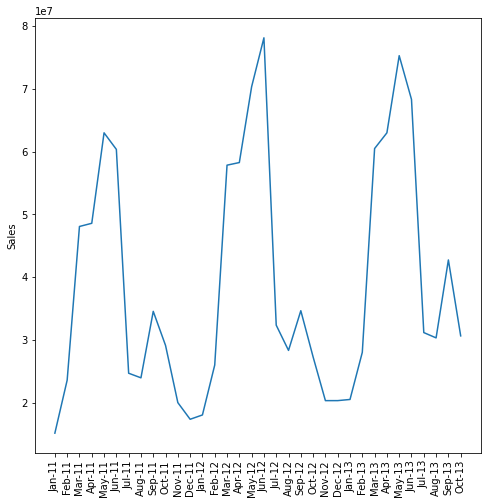

In [ ]:
plot_trend(sales,years)

In [ ]:
for i in range(len(years)):
    data[years[i]]=data[years[i]].apply(lambda x:x.replace(',',''))

  

In [ ]:
for i in range(len(years)):
    data[years[i]] = pd.to_numeric(data[years[i]], downcast="float")



In [ ]:
data.head()

,Area,Brands,Jan-11,Feb-11,Mar-11,Apr-11,May-11,Jun-11,Jul-11,Aug-11,Sep-11,Oct-11,Nov-11,Dec-11,Jan-12,Feb-12,Mar-12,Apr-12,May-12,Jun-12,Jul-12,Aug-12,Sep-12,Oct-12,Nov-12,Dec-12,Jan-13,Feb-13,Mar-13,Apr-13,May-13,Jun-13,Jul-13,Aug-13,Sep-13,Oct-13
0,All India,Softdrink Company,15196351.0,23629740.0,48083748.0,48590132.0,62985496.0,60351720.0,24732264.0,24000388.0,34578408.0,29153920.0,20054708.0,17405736.0,18092612.0,26037552.0,57839260.0,58255696.0,70322240.0,78104040.0,32379824.0,28364600.0,34680752.0,27320132.0,20370880.0,20374000.0,20557608.0,28058448.0,60484680.0,62985712.0,75260312.0,68300752.0,31200468.0,30356056.0,42756744.0,30678060.0
1,All India,Brand 1,4621187.0,6823795.0,14140333.0,13970100.0,18897430.0,17364990.0,7030613.0,6783651.0,9823008.0,9125534.0,6308614.0,5718845.0,5690564.0,7694734.0,17077388.0,16707276.0,20168716.0,21694018.0,8861042.0,7730681.0,9910934.0,8567420.0,6225597.0,6331747.0,6288368.0,8025054.0,17861028.0,17281992.0,21063824.0,18069328.0,8069254.0,8596459.0,12646410.0,9509510.0
2,All India,Brand 5,4686560.0,6516448.0,13832126.0,14036369.0,18158118.0,17463828.0,7081256.0,6581497.0,9785728.0,8723025.0,5554711.0,4939933.0,5416920.0,7481492.0,17110032.0,17380840.0,22286152.0,24470418.0,9106569.0,7932821.0,9965019.0,8037380.0,5503039.0,5557121.0,6123239.0,8050943.0,18936244.0,19124536.0,24173672.0,21204412.0,8356708.0,8458936.0,12228679.0,8799492.0
3,All India,Brand 2,2495705.0,3854046.0,6484435.0,6315716.0,7221353.0,7587892.0,3607983.0,3781319.0,5284919.0,4189982.0,3308382.0,3083264.0,3193717.0,4581239.0,8320542.0,8315392.0,9212829.0,10953646.0,5256366.0,5394182.0,6289746.0,4884456.0,4488347.0,4685626.0,4576240.0,5970982.0,10113036.0,11337889.0,11179409.0,11120443.0,6243840.0,6555460.0,7966045.0,5779961.0
4,All India,Brand 4,1514996.0,3136202.0,6260127.0,6629030.0,8831403.0,9031927.0,3766764.0,3727045.0,5209867.0,3498841.0,2256914.0,1708377.0,1668299.0,2886979.0,6892779.0,7118533.0,8655077.0,10706122.0,4997272.0,3849876.0,4391464.0,2916107.0,1906137.0,1605421.0,1458881.0,2728009.0,6076245.0,7112272.0,8806431.0,9536337.0,4668458.0,3688483.0,5339145.0,3356363.0


# Pivot tables and other useful tables

In [ ]:
year_11=extract_year(columns,'11')


In [ ]:
data.head()

,Area,Brands,Jan-11,Feb-11,Mar-11,Apr-11,May-11,Jun-11,Jul-11,Aug-11,Sep-11,Oct-11,Nov-11,Dec-11,Jan-12,Feb-12,Mar-12,Apr-12,May-12,Jun-12,Jul-12,Aug-12,Sep-12,Oct-12,Nov-12,Dec-12,Jan-13,Feb-13,Mar-13,Apr-13,May-13,Jun-13,Jul-13,Aug-13,Sep-13,Oct-13
0,All India,Softdrink Company,15196351.0,23629740.0,48083748.0,48590132.0,62985496.0,60351720.0,24732264.0,24000388.0,34578408.0,29153920.0,20054708.0,17405736.0,18092612.0,26037552.0,57839260.0,58255696.0,70322240.0,78104040.0,32379824.0,28364600.0,34680752.0,27320132.0,20370880.0,20374000.0,20557608.0,28058448.0,60484680.0,62985712.0,75260312.0,68300752.0,31200468.0,30356056.0,42756744.0,30678060.0
1,All India,Brand 1,4621187.0,6823795.0,14140333.0,13970100.0,18897430.0,17364990.0,7030613.0,6783651.0,9823008.0,9125534.0,6308614.0,5718845.0,5690564.0,7694734.0,17077388.0,16707276.0,20168716.0,21694018.0,8861042.0,7730681.0,9910934.0,8567420.0,6225597.0,6331747.0,6288368.0,8025054.0,17861028.0,17281992.0,21063824.0,18069328.0,8069254.0,8596459.0,12646410.0,9509510.0
2,All India,Brand 5,4686560.0,6516448.0,13832126.0,14036369.0,18158118.0,17463828.0,7081256.0,6581497.0,9785728.0,8723025.0,5554711.0,4939933.0,5416920.0,7481492.0,17110032.0,17380840.0,22286152.0,24470418.0,9106569.0,7932821.0,9965019.0,8037380.0,5503039.0,5557121.0,6123239.0,8050943.0,18936244.0,19124536.0,24173672.0,21204412.0,8356708.0,8458936.0,12228679.0,8799492.0
3,All India,Brand 2,2495705.0,3854046.0,6484435.0,6315716.0,7221353.0,7587892.0,3607983.0,3781319.0,5284919.0,4189982.0,3308382.0,3083264.0,3193717.0,4581239.0,8320542.0,8315392.0,9212829.0,10953646.0,5256366.0,5394182.0,6289746.0,4884456.0,4488347.0,4685626.0,4576240.0,5970982.0,10113036.0,11337889.0,11179409.0,11120443.0,6243840.0,6555460.0,7966045.0,5779961.0
4,All India,Brand 4,1514996.0,3136202.0,6260127.0,6629030.0,8831403.0,9031927.0,3766764.0,3727045.0,5209867.0,3498841.0,2256914.0,1708377.0,1668299.0,2886979.0,6892779.0,7118533.0,8655077.0,10706122.0,4997272.0,3849876.0,4391464.0,2916107.0,1906137.0,1605421.0,1458881.0,2728009.0,6076245.0,7112272.0,8806431.0,9536337.0,4668458.0,3688483.0,5339145.0,3356363.0


## Trend of Brands Very year

In [ ]:
x=data.groupby(['Brands'])[years].sum()

x

,Jan-11,Feb-11,Mar-11,Apr-11,May-11,Jun-11,Jul-11,Aug-11,Sep-11,Oct-11,Nov-11,Dec-11,Jan-12,Feb-12,Mar-12,Apr-12,May-12,Jun-12,Jul-12,Aug-12,Sep-12,Oct-12,Nov-12,Dec-12,Jan-13,Feb-13,Mar-13,Apr-13,May-13,Jun-13,Jul-13,Aug-13,Sep-13,Oct-13
Brands,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Brand 1,9242374.0,13647591.0,28280668.0,27940198.0,37794856.0,34729980.0,14061226.0,13567301.0,19646016.0,18251068.0,12617226.0,11437690.0,11381129.0,15389468.0,34154776.0,33414552.0,40337432.0,43388032.0,17722084.0,15461361.0,19821868.0,17134840.0,12451193.0,12663496.0,12576737.0,16050108.0,35722056.0,34563988.0,42127648.0,36138656.0,16138507.0,17192920.0,25292820.0,19019020.0
Brand 2,4991410.0,7708091.0,12968871.0,12631432.0,14442706.0,15175782.0,7215966.0,7562638.0,10569838.0,8379965.0,6616765.0,6166528.0,6387432.0,9162476.0,16641086.0,16630784.0,18425656.0,21907292.0,10512731.0,10788365.0,12579493.0,9768911.0,8976693.0,9371251.0,9152480.0,11941962.0,20226072.0,22675782.0,22358818.0,22240888.0,12487678.0,13110920.0,15932090.0,11559922.0
Brand 3,3755806.0,6598501.0,14733451.0,15277833.0,19754382.0,17806172.0,6491292.0,6253755.0,8949767.0,7233079.0,5252173.0,3910637.0,4246223.0,6786216.0,16877044.0,17467312.0,19998940.0,20559676.0,8317151.0,6914080.0,8247176.0,5829540.0,4495519.0,4388171.0,4221759.0,6566919.0,14996253.0,16258045.0,20073948.0,16740471.0,7724416.0,6113439.0,9152930.0,6465470.0
Brand 4,3029991.0,6272404.0,12520256.0,13258059.0,17662804.0,18063854.0,7533529.0,7454091.0,10419733.0,6997681.0,4513828.0,3416757.0,3336595.0,5773958.0,13785559.0,14237068.0,17310154.0,21412244.0,9994544.0,7699752.0,8782930.0,5832214.0,3812278.0,3210842.0,2917763.0,5456018.0,12152489.0,14224544.0,17612862.0,19072674.0,9336915.0,7376963.0,10678289.0,6712724.0
Brand 5,9373119.0,13032896.0,27664254.0,28072736.0,36316236.0,34927656.0,14162514.0,13162994.0,19571460.0,17446048.0,11109422.0,9879865.0,10833842.0,14962985.0,34220064.0,34761680.0,44572304.0,48940836.0,18213140.0,15865642.0,19930034.0,16074762.0,11006079.0,11114242.0,12246479.0,16101885.0,37872488.0,38249072.0,48347344.0,42408824.0,16713415.0,16917872.0,24457358.0,17598984.0
Softdrink Company,30392704.0,47259480.0,96167496.0,97180264.0,125970992.0,120703440.0,49464528.0,48000780.0,69156816.0,58307840.0,40109416.0,34811472.0,36185224.0,52075104.0,115678520.0,116511392.0,140644480.0,156208080.0,64759648.0,56729200.0,69361504.0,54640264.0,40741760.0,40748000.0,41115212.0,56116896.0,120969360.0,125971424.0,150520624.0,136601504.0,62400936.0,60712112.0,85513488.0,61356120.0


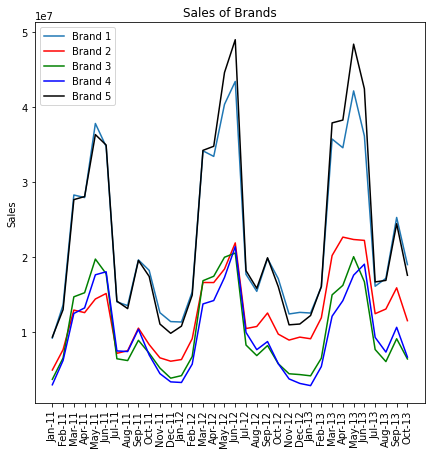

In [ ]:
xx=list(x.loc['Brand 1'].values)
yy=list(x.loc['Brand 2'].values)
aa=list(x.loc['Brand 3'].values)
zz=list(x.loc['Brand 4'].values)
bb=list(x.loc['Brand 5'].values)
plt.figure(figsize=(7,7))
plt.plot(years,xx)
plt.plot(years,yy,'r')
plt.plot(years,aa,'g')
plt.plot(years,zz,'b')
plt.plot(years,bb,'k')
plt.ylabel('Sales')
plt.title('Sales of Brands')
plt.xticks(rotation=90)
legends=['Brand 1','Brand 2','Brand 3','Brand 4','Brand 5']
plt.legend(legends)
plt.savefig('brands.png')
plt.show()

## sales of brands according to the area

In [ ]:
y=(data.groupby(['Area'])[years].sum())/2
y

,Jan-11,Feb-11,Mar-11,Apr-11,May-11,Jun-11,Jul-11,Aug-11,Sep-11,Oct-11,Nov-11,Dec-11,Jan-12,Feb-12,Mar-12,Apr-12,May-12,Jun-12,Jul-12,Aug-12,Sep-12,Oct-12,Nov-12,Dec-12,Jan-13,Feb-13,Mar-13,Apr-13,May-13,Jun-13,Jul-13,Aug-13,Sep-13,Oct-13
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
All India,15196352.0,23629740.0,48083748.0,48590132.0,62985496.0,60351720.0,24732264.0,24000388.0,34578408.0,29153920.0,20054708.0,17405736.0,18092612.0,26037552.0,57839260.0,58255696.0,70322240.0,78104040.0,32379824.0,28364600.0,34680752.0,27320132.0,20370880.0,20374000.0,20557608.0,28058448.0,60484680.0,62985712.0,75260312.0,68300752.0,31200468.0,30356056.0,42756744.0,30678060.0
Andhra Pradesh,3508931.0,3637403.5,7457338.0,6798483.5,9040833.0,9289960.0,4420089.0,4504625.5,5834414.0,5829266.0,3574429.0,3878487.0,3960737.0,4279993.0,9220483.0,7716954.0,9744466.0,10575412.0,4440462.0,4922512.0,5755389.0,5236991.5,3772629.0,4469697.5,4588395.5,4617552.0,8842715.0,8199813.0,9889598.0,10131072.0,4611206.5,5456891.0,7098418.0,5772439.0
Assam & NE,154945.0,283238.5,672221.5,639064.0,913629.0,947466.0,552538.0,434628.5,654566.5,339347.0,102984.0,66260.0,196963.5,361479.0,752262.0,719162.0,1059938.5,978459.5,509554.0,553654.5,529510.0,201649.0,98404.0,80239.5,243331.0,291179.0,933846.0,822755.0,755633.5,1339945.0,625976.5,581807.0,606089.0,247972.0
Bihar (incl. J.khand),396168.0,567298.5,1711921.0,1906406.0,2420714.5,2661739.0,818751.0,581082.5,846649.0,491264.5,224457.0,114330.5,549085.0,727307.0,2296956.5,2443252.5,3375147.0,3815461.5,1077197.5,694987.5,968284.5,599505.5,176543.0,135378.0,694501.5,822942.0,2681446.0,3169274.0,3961095.0,2811815.0,1191647.0,1061580.5,1355382.0,618194.0
Delhi,942205.5,1869444.0,2920755.0,3168638.5,4274479.5,4770484.5,2459920.0,2577155.0,3410881.0,2724843.5,1795374.5,1391647.0,1032646.0,1865156.0,3825698.0,3946947.0,4326278.5,5829874.0,3473612.5,2930443.5,3081249.0,2457183.0,1721104.0,1548882.0,951818.5,1756314.5,3937346.5,4503210.5,4946392.0,6340157.5,3429396.0,3001904.0,4203905.0,2785289.5
Goa,228600.0,247108.5,320088.0,271297.5,325595.0,194475.5,103564.0,131122.0,199113.0,227253.0,294521.5,375477.5,274350.0,258987.5,360353.5,320047.5,355637.5,243426.0,120447.0,154488.0,217994.5,228423.5,281852.5,396005.5,265395.0,292664.0,397288.0,336814.5,355113.5,210922.0,113817.5,155908.0,269407.5,226495.5
Gujarat,940781.5,1117912.5,2301382.0,2163116.5,2827050.0,2824813.0,1071823.0,1138237.0,1529430.5,2060787.0,1817586.0,1277592.0,1252749.0,1324433.5,2903575.0,2996014.0,3536088.5,3590277.5,1619776.0,1665443.5,1733860.5,2224125.0,1971058.0,1560283.0,1610902.0,2050764.5,4018704.0,3312928.0,4210922.0,3575300.0,1561656.5,1467447.5,2514153.5,2389443.5
Jammu,73945.5,153566.5,479929.5,431148.0,784070.5,985493.5,557622.5,438739.0,511621.5,267409.5,152268.5,79182.5,89502.0,182481.5,559583.5,533376.5,680217.0,1008657.0,669135.5,516247.5,566720.0,231599.0,158046.5,92162.0,109175.5,181427.0,479913.0,581358.5,710872.0,1081465.0,617277.0,473976.0,632236.0,300441.0
Karnataka,1161755.0,1269963.0,2381758.0,2293112.5,2276538.0,1619014.0,942357.0,913204.0,1516804.0,1636626.5,1283528.0,1435532.0,1324415.0,1577204.5,3099942.0,2948004.0,2551031.0,2251358.5,1192115.5,1183382.0,1692172.0,1613022.5,1436856.0,1829799.5,1530726.5,1733333.5,3309144.5,3252833.0,3119388.0,1916050.0,1115219.0,1255940.5,1732048.0,1699443.5


In [ ]:
country=list(y.loc['All India'].values)

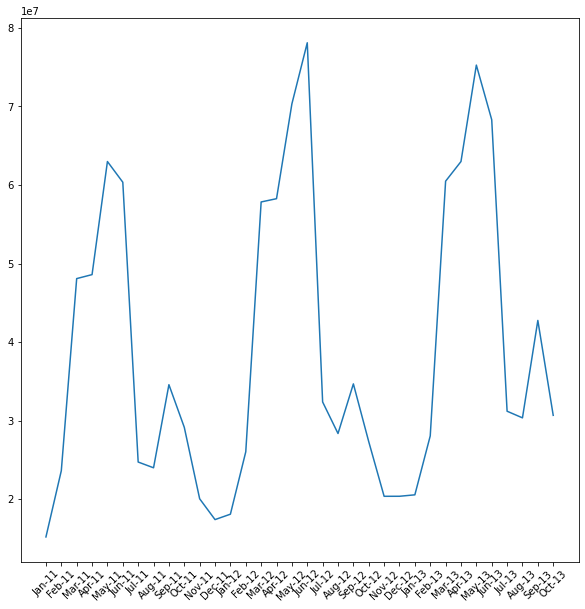

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(years,country)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# In year 11,12,13 top five states that give the maximum sales:
year_11=extract_year(columns,'11')
year_12=extract_year(columns,'12')
year_13=extract_year(columns,'13')



## Top leading states in sales in every year


In [ ]:
data_11=y[year_11]
data_11.head()

,Jan-11,Feb-11,Mar-11,Apr-11,May-11,Jun-11,Jul-11,Aug-11,Sep-11,Oct-11,Nov-11,Dec-11
Area,,,,,,,,,,,,
All India,15196352.0,23629740.0,48083748.0,48590132.0,62985496.0,60351720.0,24732264.0,24000388.0,34578408.0,29153920.0,20054708.0,17405736.0
Andhra Pradesh,3508931.0,3637403.5,7457338.0,6798483.5,9040833.0,9289960.0,4420089.0,4504625.5,5834414.0,5829266.0,3574429.0,3878487.0
Assam & NE,154945.0,283238.5,672221.5,639064.0,913629.0,947466.0,552538.0,434628.5,654566.5,339347.0,102984.0,66260.0
Bihar (incl. J.khand),396168.0,567298.5,1711921.0,1906406.0,2420714.5,2661739.0,818751.0,581082.5,846649.0,491264.5,224457.0,114330.5
Delhi,942205.5,1869444.0,2920755.0,3168638.5,4274479.5,4770484.5,2459920.0,2577155.0,3410881.0,2724843.5,1795374.5,1391647.0


In [ ]:
data_11['Total sale in 2011']=data_11.sum(axis=1)
data_11.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Jan-11,Feb-11,Mar-11,Apr-11,May-11,Jun-11,Jul-11,Aug-11,Sep-11,Oct-11,Nov-11,Dec-11,Total sale in 2011
Area,,,,,,,,,,,,,
All India,15196352.0,23629740.0,48083748.0,48590132.0,62985496.0,60351720.0,24732264.0,24000388.0,34578408.0,29153920.0,20054708.0,17405736.0,408762624.0
Andhra Pradesh,3508931.0,3637403.5,7457338.0,6798483.5,9040833.0,9289960.0,4420089.0,4504625.5,5834414.0,5829266.0,3574429.0,3878487.0,67774256.0
Assam & NE,154945.0,283238.5,672221.5,639064.0,913629.0,947466.0,552538.0,434628.5,654566.5,339347.0,102984.0,66260.0,5760888.0
Bihar (incl. J.khand),396168.0,567298.5,1711921.0,1906406.0,2420714.5,2661739.0,818751.0,581082.5,846649.0,491264.5,224457.0,114330.5,12740782.0
Delhi,942205.5,1869444.0,2920755.0,3168638.5,4274479.5,4770484.5,2459920.0,2577155.0,3410881.0,2724843.5,1795374.5,1391647.0,32305828.0


In [ ]:
value=data_11['Total sale in 2011'].sort_values(ascending=False)[1:6]
values=[x for x in value]
indexs=[x for x in value.index]
values
indexs

['Andhra Pradesh', 'Uttar Pradesh', 'Punjab', 'Maharashtra', 'Delhi']

In [ ]:
# function of 5 in each year
import seaborn as sns
def top_5(data,which):
 value=data[which].sort_values(ascending=False)[1:6]

 values=[x for x in value]
 indexs=[x for x in value.index]
 plt.figure(figsize=(5,3))
 plt.xticks(rotation=10)
 plt.ylabel('Sales')
 plt.title('Total Sales in year {}'.format(which.split()[-1]))
 sns.barplot(indexs,value)
 
 plt.savefig('sales in {}'.format(which.split()[-1])+'.png')
 plt.show()
 return


In [ ]:
'Total sale in 2011'.split()[-1]

'2011'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


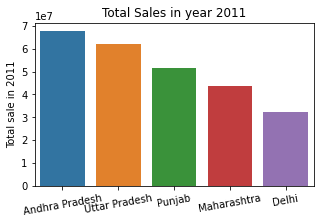

In [ ]:
top_5(data_11,'Total sale in 2011')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


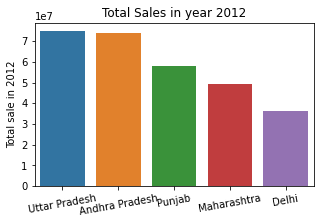

In [ ]:
# top 5 sales in 2012
data_12=y[year_12]
data_12['Total sale in 2012']=data_12.sum(axis=1)

top_5(data_12,'Total sale in 2012')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


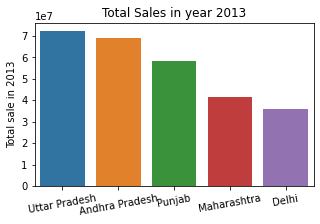

In [ ]:
# top 5 sales in 2013
data_13=y[year_13]
data_13['Total sale in 2013']=data_13.sum(axis=1)

top_5(data_13,'Total sale in 2013')

## Top Brands in every state and in whole country

In [ ]:
data4=data.groupby(['Area','Brands'])[year_11].sum()
data5=data.groupby(['Area','Brands'])[year_12].sum()
data6=data.groupby(['Area','Brands'])[year_13].sum()


In [ ]:
data4['Total sale in 2011']=data4.sum(axis=1) 
data5['Total sale in 2012']=data5.sum(axis=1) 
data6['Total sale in 2013']=data6.sum(axis=1) 

In [ ]:
def top3_brands(data,area,which_year):
    x=data.loc[area][which_year].sort_values(ascending=False)[1:4]
    print('Top Saleing Brands in {} are'.format(area))
    for i in x.index:
        print(i,'\n','with sale of {}'.format(x[i]))
    return

In [ ]:
#
#x=data4.loc['All India']['Total sale in 2011'].sort_values(ascending=False)[1:4]  
#x

top3_brands(data4,'All India','Total sale in 2011')

Top Saleing Brands in All India are
Brand 1 
 with sale of 120608104.0
Brand 5 
 with sale of 117359600.0
Brand 3 
 with sale of 58008424.0


In [ ]:
top3_brands(data5,'All India','Total sale in 2012')

Top Saleing Brands in All India are
Brand 5 
 with sale of 140247808.0
Brand 1 
 with sale of 136660112.0
Brand 2 
 with sale of 75576080.0


In [ ]:
top3_brands(data6,'All India','Total sale in 2013')

Top Saleing Brands in All India are
Brand 5 
 with sale of 135456864.0
Brand 1 
 with sale of 127411224.0
Brand 2 
 with sale of 80843304.0


In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('NielsenIQInternship.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/NielsenIQInternship.ipynb to pdf
[NbConvertApp] Support files will be in NielsenIQInternship_files/
[NbConvertApp] Making directory ./NielsenIQInternship_files
[NbConvertApp] Making directory ./NielsenIQInternship_files
[NbConvertApp] Making directory ./NielsenIQInternship_files
[NbConvertApp] Making directory ./NielsenIQInternship_files
[NbConvertApp] Making directory ./NielsenIQInternship_files
[NbConvertApp] Making directory ./NielsenIQInternship_files
[NbConvertApp] Writing 61858 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'